# Randles-Sevcik Equation Analysis

We want to determine the diffusion coefficient from the cyclic voltammetry measurements taken under stagnant conditions. The analysis uses the Randles-Sevcik equation which is given below:

## $ I_P = 2.686 x 10^{5} * n^{3/2} * A *  D^{1/2} * C * v^{1/2} $

Where:
* $I_P$ = Peak current (Amps)
* $n$ = number of electrons in redox event
* $A$ = Area of the electrode ($cm^2$)
* $D$ = Diffusion Constant ($cm^2 / s$)
* $C$ = Redox species concentration ($mol / cm^3$)
* $v$ = Sweep Rate ($V /s$)

This analysis will be performed here for the oxidation reaction, but the same process can be used for the reduction reaction.

## $Fe(CN) _{6} ^{4-} \Rightarrow Fe(CN) _{6} ^{3-} + e^{-}$


In [1]:
# Import Python Packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

# First we load the data and plot current vs. potential

In [2]:
cv_050 = pd.read_csv("CV_050mVs.txt", sep='\t')
cv_150 = pd.read_csv("CV_150mVs.txt", sep='\t')
cv_250 = pd.read_csv("CV_250mVs.txt", sep='\t')
cv_300 = pd.read_csv("CV_300mVs.txt", sep='\t')
cv_050.head()

,Point,Potential(mV),Current(microAmp)
0,1,499.954045,163.152785
1,2,504.325569,166.306549
2,3,509.399593,168.867031
3,4,514.317572,170.709332
4,5,519.391656,171.989566


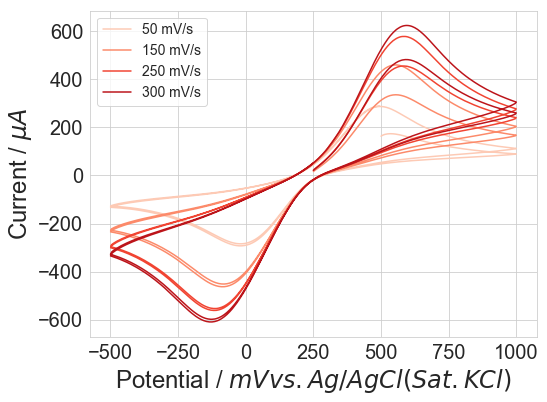

In [3]:
sns.set_style('whitegrid')
fig1 = plt.figure()
fig1.set_size_inches(8, 6)
ax1 = fig1.add_subplot(111)
colors = sns.color_palette("Reds", 4)
ax1.plot(cv_050["Potential(mV)"], cv_050["Current(microAmp)"], color=colors[0], label="50 mV/s")
ax1.plot(cv_150["Potential(mV)"], cv_150["Current(microAmp)"], color=colors[1], label="150 mV/s")
ax1.plot(cv_250["Potential(mV)"], cv_250["Current(microAmp)"], color=colors[2], label="250 mV/s")
ax1.plot(cv_300["Potential(mV)"], cv_300["Current(microAmp)"], color=colors[3], label="300 mV/s")

ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.set_ylabel("Current / $\mu A$", fontsize=24)
ax1.set_xlabel("Potential / $mV vs. Ag/AgCl (Sat. KCl)$", fontsize=24)
ax1.legend(frameon=True, fontsize=14)
plt.show()
plt.close(fig1)

In [4]:
df_rs_analysis = pd.DataFrame()

# Input scanrates in units of V/s
scanrates = [0.05, 0.15, 0.250, 0.300]

# Get the peak current by finding the maximum value of each CV.
current_max = [max(cv_050["Current(microAmp)"]),
              max(cv_150["Current(microAmp)"]),max(cv_250["Current(microAmp)"]),max(cv_300["Current(microAmp)"]),
              ]

df_rs_analysis['Scanrate'] = scanrates
df_rs_analysis['PeakCurrent'] = current_max
df_rs_analysis.head()

,Scanrate,PeakCurrent
0,0.05,288.522715
1,0.15,459.481729
2,0.25,577.732280
3,0.30,623.290136


In [5]:
electrode_diameter = 0.5 # cm
electrode_area = np.pi * (electrode_diameter/2)**2 # cm^2
df_rs_analysis["Normalized Current"] = df_rs_analysis["PeakCurrent"] * 1e-6 / electrode_area # Convert to Amps/cm^2
df_rs_analysis.head()

,Scanrate,PeakCurrent,Normalized Current
0,0.05,288.522715,0.001469
1,0.15,459.481729,0.002340
2,0.25,577.732280,0.002942
3,0.30,623.290136,0.003174


# Fit the peak current vs. square root of scan rate to a line

From the RS Equation: 

## $ I_P = 2.686 x 10^{5} * n^{3/2} * A *  D^{1/2} * C * v^{1/2} $

### The slope of ${I_P}/A$ vs $v^{1/2}$ is $2.686 x 10^{4} n^{3/2} D^{1/2} C$.



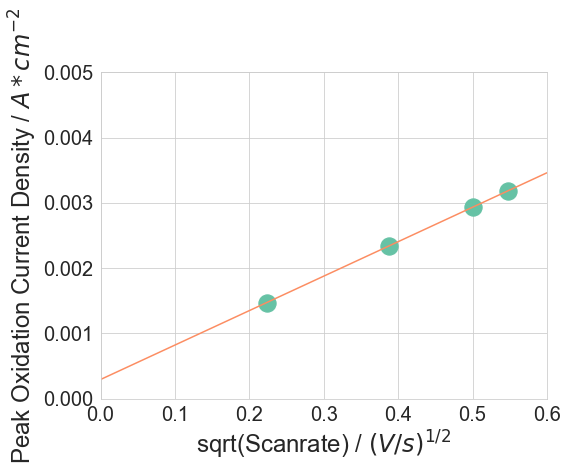

In [6]:

# Fit the slope of current density vsl sqrt(Scanrate)

df_rs_analysis["SQRT Scanrate"] = np.sqrt(df_rs_analysis["Scanrate"])
slope, intercept, r_value, _, _ = stats.linregress(df_rs_analysis["SQRT Scanrate"], df_rs_analysis["Normalized Current"])
x_values = np.linspace(0,0.6)
line = slope*x_values + intercept

sns.set_style('whitegrid')
fig1 = plt.figure()
fig1.set_size_inches(8, 6)
ax1 = fig1.add_subplot(111)
colors = sns.color_palette("Set2", 4)

ax1.scatter(df_rs_analysis["SQRT Scanrate"], df_rs_analysis["Normalized Current"], s=300, color=colors[0])
ax1.plot(x_values, line, color=colors[1], label="")

ax1.set_ylim([0, 0.005])
ax1.set_xlim([0, 0.6])
ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.set_xlabel("sqrt(Scanrate) / $(V/s)^{1/2}$", fontsize=24)
ax1.set_ylabel("Peak Oxidation Current Density / $A*cm^{-2}$", fontsize=24)

plt.show()


In [7]:
# Print out the slope and R2 value
slope, r_value**2

(0.0052821753241398383, 0.99987370795115926)

# Solve for the diffusion coefficient

Let $S$ = the slope from the linear fit.

### $S$ = $2.686 x 10^{5} n^{3/2} D^{1/2} C$

Rearranging:

### $D =  (\frac{S}{2.686 x 10^{5} n^{3/2} C})^2$
 
* $n$ = 1 for the ferri/ferrocyanide reaction.
* $C$ = Concentration, given as 10 mM. 


In [9]:
concentration_molar = 0.01 # mol / L

# Convert from molar to mol/cm^3
# C (mol / L) * ( 1 L / 1000 mL) * ( 1 mL / 1 cm^3)

concentration_molcm3 = concentration_molar / (1000)
diffusion_coeff = (slope/(2.686e5 * 1 * concentration_molcm3))**2

In [10]:
diffusion_coeff

3.8673511524348424e-06

# Result

### The diffusion coefficient we calculated is $3.87 x 10^{-6} cm^2 / s$. The literature value from [1] is $7.26 x 10^{-6} cm^2 / s$. 


* [1] S. J. Konopka and B. McDuffie, Analytical Chemistry, 42, 1741–1746 (1970). 
